In [33]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from PIL import Image

In [4]:
training_data = datasets.FashionMNIST(
                root = "data",
                train = True,
                download = True,
                transform = ToTensor()
)
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100.0%


Extracting data\FashionMNIST\raw\train-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to data\FashionMNIST\raw



100.0%


Extracting data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to data\FashionMNIST\raw



100.0%

Extracting data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to data\FashionMNIST\raw



In [5]:
batch_size = 64
train_data_loader = DataLoader(training_data,batch_size=batch_size)
test_data_loader = DataLoader(test_data,batch_size=batch_size)




In [6]:

def get_device():
    return (
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backend.mps.is_available()
    else "cpu"
)

device = get_device()
print(f"Using {device} device")

Using cuda device


In [85]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork,self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28,512),
            nn.ReLU(),
            nn.Linear(512,512),
            nn.ReLU(),
            nn.Linear(512,10),
        )
        

    def forward(self,x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits
    
model = NeuralNetwork().to(device)
print(model)

TypeError: Softmax.__init__() takes from 1 to 2 positional arguments but 3 were given

In [28]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 1e-3)

In [9]:
test_data_loader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [107]:
def test(dataloader, model):
    size = len(dataloader.dataset)
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total}%')

test(test_data_loader, model)

Accuracy: 88.56%


In [29]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    correct = 0
    total = 0
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)

        # compute loss
        pred = model(x)
        loss = loss_fn(pred,y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss , current = loss.item() , (batch + 1) * len(x)
            print(f"Batch no: {batch} | loss: {loss:>7f} [{current:>5d} / {size:>5d}]")

            


In [95]:
epochs = 100
for t in range(epochs):
    train(train_data_loader, model, loss_fn, optimizer)

loss: 0.196079 [   64 / 60000]
loss: 0.222081 [ 6464 / 60000]
loss: 0.203295 [12864 / 60000]
loss: 0.242569 [19264 / 60000]
loss: 0.307420 [25664 / 60000]
loss: 0.259524 [32064 / 60000]
loss: 0.176705 [38464 / 60000]
loss: 0.342191 [44864 / 60000]
loss: 0.252588 [51264 / 60000]
loss: 0.294835 [57664 / 60000]
loss: 0.176613 [   64 / 60000]
loss: 0.217044 [ 6464 / 60000]
loss: 0.194808 [12864 / 60000]
loss: 0.213159 [19264 / 60000]
loss: 0.279747 [25664 / 60000]
loss: 0.251399 [32064 / 60000]
loss: 0.177814 [38464 / 60000]
loss: 0.350039 [44864 / 60000]
loss: 0.264063 [51264 / 60000]
loss: 0.268075 [57664 / 60000]
loss: 0.158067 [   64 / 60000]
loss: 0.202453 [ 6464 / 60000]
loss: 0.200762 [12864 / 60000]
loss: 0.203748 [19264 / 60000]
loss: 0.317721 [25664 / 60000]
loss: 0.260677 [32064 / 60000]
loss: 0.199154 [38464 / 60000]
loss: 0.295253 [44864 / 60000]
loss: 0.262306 [51264 / 60000]
loss: 0.243084 [57664 / 60000]
loss: 0.144381 [   64 / 60000]
loss: 0.210195 [ 6464 / 60000]
loss: 0.

In [103]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
import random
index = random.randint(0,255)
x_test , y_test = test_data[index][0], test_data[index][1]

x_test = x_test.to(device)
pred = model(x_test)
pred.argmax()

tensor(3, device='cuda:0')

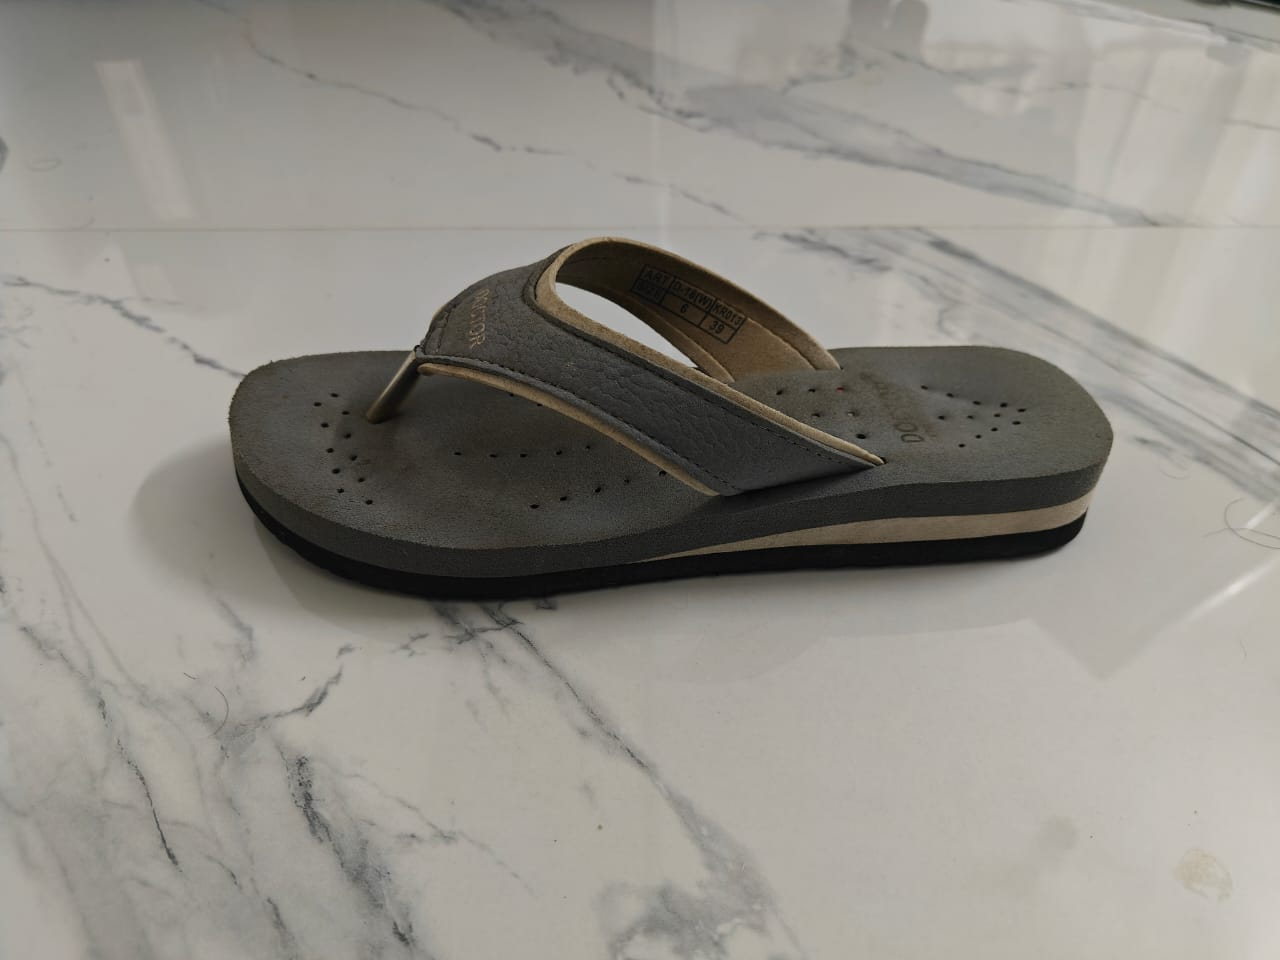

In [104]:
import torchvision.transforms as transforms
image = Image.open('sandal.jpeg')
transform = transforms.Compose([transforms.Resize((28, 28)),
                                transforms.Grayscale(num_output_channels=1),
                                transforms.PILToTensor()])
img_tensor = transform(image).to(device)/255 
# img_tensor = (img_tensor - img_tensor.min()) / (img_tensor.max() - img_tensor.min())
pred = model(img_tensor)



image

In [102]:
print(f'It is a {classes[pred.argmax()]}')

It is a Shirt


In [89]:
pred

tensor([[-12.9778, -11.7426, -10.6135, -27.8912, -20.5942, -15.6534,  -8.7474,
         -12.8916,   8.5327,  -3.3789]], device='cuda:0',
       grad_fn=<AddmmBackward0>)